# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Ayu Indah Permata
- Email: ayuindahp02@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Pada musim dan bulan apakah yang memiliki jumlah sewa sepeda tertinggi dan terendah?
- pertanyaan 2: Bagaimanakah pengaruh temperatur, humidity, dan windspeed dengan minat penyewaan sepeda?
- pertanyaan 3: Bagaimana pertumbuhan bisnis tersebut pada tahun 2011-2012?

## Menyiapkan semua library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

1. Memanggil dataset

In [5]:
day_df = pd.read_csv(r"C:\Users\ACER\submission\Bike-sharing-dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2. Menghapus beberapa kolom yang tidak diperlukan

In [6]:
drop_col = ['instant']

for i in day_df.columns:
    if i in drop_col:
        day_df.drop(labels = i, axis = 1, inplace = True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


3. Mengubah nama judul kolom, mengubah angka menjadi keterangan, dan mengubah beberapa nilai (temp, atemp, hum, windspeed)

In [7]:
day_df.rename(columns={'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'yr':'year'},inplace=True)

In [8]:
day_df['weather_condition']= day_df['weather_condition'].map({1: 'Clear to partly cloudy', 2: 'Misty and cloudy',
                                                              3: 'Light rain or snow', 4: 'Heavy rain or snow'})

day_df['season']= day_df['season'].map({1:'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

day_df['month']= day_df['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['weekday']= day_df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})



In [9]:
day_df[['temp', 'atemp', 'humidity', 'windspeed']] = day_df[['temp', 'atemp', 'humidity', 'windspeed']].multiply([41, 50, 100, 67], axis=1)

4. Menyesuaikan tipe data dan mengecek tipe data setelah diubah

In [10]:
# Mengubah tipe data datetime 
day_df['datetime'] = pd.to_datetime(day_df.datetime)

# Tipe data categorical
day_df['season'] = day_df.season.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['year'] = day_df.year.astype('category')

day_df.head()

,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty and cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty and cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear to partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear to partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear to partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Assessing Data

1. Cek tipe data day_df

In [11]:
# Cek tipe data
print("\nTipe data day_df:\n")
day_df.info()


Tipe data day_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64     

2. Cek missing values

In [12]:
# Cek missing value
print("\nJumlah missing value pada day_df:\n", day_df.isna().sum())


Jumlah missing value pada day_df:
 datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64


Setelah dilakukan pengecekan diperoleh bahwa pada data frame day_df tidak terdapat missing value

3. Cek duplikasi data

In [13]:
# Cek duplicate data
print("\nJumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


Setelah dilakukan pengecekan diperoleh bahwa pada data frame day_df tidak terdapat duplikasi data

4. Cek parameter statistik

In [14]:
# Cek parameter statistik
print("\nParameter statistik pada day_df:\n")
day_df.describe()


Parameter statistik pada day_df:



,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Cleaning Data

Karean data day_df sudah lengkap (tidak terdapat missing value) dan tidak memiliki duplikasi data, maka data day_df dapat digunakan pada langkah selanjutnya, yaitu EDA

## Exploratory Data Analysis (EDA)

1. Cek penyewa (casual, registered, dan keseluruhan) berdasarkan season

In [15]:
day_df.groupby(by= ['season']).agg({
    'casual':['mean'],
    'registered':['mean'],
    'total_count':['max','min','mean']
})

casual   registered total_count                   
               mean         mean         max   min         mean
season                                                         
Fall    1202.611702  4441.691489        8714  1115  5644.303191
Spring   334.928177  2269.204420        7836   431  2604.132597
Summer  1106.097826  3886.233696        8362   795  4992.331522
Winter   729.112360  3999.050562        8555    22  4728.162921

Ket:
- Berdasarkan tabel diatas diperoleh bahwa rata-rata terbesar penyewa (total count) adalah pada season fall. Sementara itu, rata-rata penyewa paling sedikit adalah pada musim spring

2. Cek penyewa berdasarkan bulan

In [16]:
day_df.groupby(by= ['month']).agg({
    'total_count':['max','min','mean', 'sum']
})

total_count                           
              max   min         mean     sum
month                                       
Apr          7460   795  4484.900000  269094
Aug          7865  1115  5664.419355  351194
Dec          6606   441  3403.806452  211036
Feb          5062  1005  2655.298246  151352
Jan          4521   431  2176.338710  134933
Jul          8173  3285  5563.677419  344948
Jun          8120  3767  5772.366667  346342
Mar          8362   605  3692.258065  228920
May          8294  2633  5349.774194  331686
Nov          6852  1495  4247.183333  254831
Oct          8156    22  5199.225806  322352
Sep          8714  1842  5766.516667  345991

Ket:
- Berdasarkan tabel di atas diperoleh bahwa rata-rata jumlah penyewa paling besar terdapat pada bulan juni, agustus, dan september. Sementara rata-rata jumlah penyewa terkecil terdapat pada bulan januari, februari, dan desember

3. Cek penyewa berdasarkan weekday

In [17]:
day_df.groupby(by= ['weekday']).agg({
    'total_count':['max','min','mean']
})

total_count                   
                max   min         mean
weekday                               
Fri            8362  1167  4690.288462
Mon            7525    22  4338.123810
Sat            8714   627  4550.542857
Sun            8227   605  4228.828571
Thu            7804   431  4667.259615
Tue            7767   683  4510.663462
Wed            8173   441  4548.538462

Ket:
- Berdasarkan tabel di atas, urutan rata-rata jumlah penyewa dari terkecil ke terbesar berdasarkan weekday yaitu: Fri, Thu, Sat, Wed, Tue, Mon, Sun

4. Cek penyewa berdasarkan workingday

In [18]:
day_df.groupby(by= ['workingday']).agg({
    'total_count':['max','min','mean', 'sum']
})

total_count                           
                   max  min         mean      sum
workingday                                       
0                 8714  605  4330.168831  1000269
1                 8362   22  4584.820000  2292410

Ket:
- Berdasarkan tabel tersebut, rata-rata jumlah penyewa pada hari kerja (working day) lebih besar daripada weekend/holiday

5. Cek temp, atemp, himidity, dan windspeed berdasarkan season

In [19]:
day_df.groupby(by= ['season']).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                           atemp                       \
              max        min       mean       max       min       mean   
season                                                                   
Fall    35.328347  19.235847  28.958682  42.04480  12.12000  32.794920   
Spring  23.472500   2.424346  12.207650  27.43085   3.95348  14.845697   
Summer  33.141653  10.374763  22.320611  37.87895  12.51695  26.015366   
Winter  26.957500   9.054153  17.339148  30.39875  11.39565  20.776937   

       humidity                      windspeed                       
            max      min       mean        max       min       mean  
season                                                               
Fall    93.9565  36.0000  63.348206  25.166339  4.292744  11.530366  
Spring  94.8261   0.0000  58.290291  34.000021  3.042356  14.373984  
Summer  92.2500  25.4167  62.694833  26.000489  4.417256  13.634978  
Winter  97.2500  33.3478  66.871917  28.292425  1.500244  11.523637

Ket:
- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring
- Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring
- Rata-rata windspeed terbesar terjadi pada musim spring, kemudian diikuti oleh summer, fall dan winter

6. Cek temp, atemp, humidity, dan windspeed berdasarkan month

In [20]:
day_df.groupby(by= ['month']).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                           atemp                       \
             max        min       mean       max       min       mean   
month                                                                   
Apr    27.230847  12.300000  19.269952  30.74625  14.17270  22.854045   
Aug    32.526653  26.069153  29.051844  37.56335  12.12000  32.573740   
Dec    19.509153   8.849153  13.285270  23.45270  11.01665  16.307985   
Feb    21.388347   5.227500  12.268284  25.59915   5.08290  14.986563   
Jan    17.425000   2.424346   9.694201  20.76915   3.95348  11.989795   
Jul    35.328347  24.429153  30.974287  42.04480  27.49560  35.204693   
Jun    34.200847  22.174153  28.047985  39.33065  26.29460  31.912286   
Mar    24.668347   8.131653  16.012089  28.50335  10.00665  19.097685   
May    31.775000  16.980847  24.386735  36.26915  20.23250  28.283100   
Nov    21.730000  10.079153  15.138010  26.23060  12.43710  18.367938   
Oct    26.957500  10.420847  19.885500  30.39875  11.39565  23.598660   
Sep    30.886653  19.235847  25.275884  35.44915  23.07375  28.964954   

      humidity                      windspeed                       
           max      min       mean        max       min       mean  
month                                                               
Apr    88.8333  25.4167  58.806312  26.000489  4.417256  15.710310  
Aug    85.0000  41.5000  63.773010  25.166339  4.708981  11.585516  
Dec    97.0417  44.1250  66.604052  27.292182  3.167425  11.832798  
Feb    92.9167  18.7917  56.746468  34.000021  3.042356  14.450824  
Jan    91.1250  31.1250  58.582827  27.833743  4.917519  13.822285  
Jul    86.5417  39.6250  59.787632  19.082471  5.416950  11.125941  
Jun    83.3333  30.5000  57.580552  23.292014  5.167375  12.423134  
Mar    94.8261   0.0000  58.847503  29.584721  6.000406  14.920863  
May    92.2500  36.0417  68.895831  22.958689  5.000712  12.260258  
Nov    96.2500  33.3478  62.487648  25.250357  3.125550  12.314695  
Oct    90.6250  46.3333  69.376087  28.292425  1.500244  11.738767  
Sep    97.2500  46.7083  71.471437  23.958329  3.375406  11.118323

7. Cek temp, atemp, humidity, dan windspeed berdasarkan year

In [21]:
day_df.groupby(by= ['year']).agg({
    'temp':['max','min','mean'],
    'atemp':['max','min','mean'],
    'humidity':['max','min','mean'],
    'windspeed':['max','min','mean']
})

temp                          atemp                     humidity  \
            max       min       mean       max      min       mean      max   
year                                                                          
0     34.815847  2.424346  19.953263  42.04480  3.95348  23.341767    97.25   
1     35.328347  4.407500  20.667313  40.24565  5.08290  24.092605    92.50   

                          windspeed                       
          min       mean        max       min       mean  
year                                                      
0      0.0000  64.366477  34.000021  1.500244  12.823977  
1     25.4167  61.216645  29.584721  3.125550  12.701344

In [24]:
day_df.groupby(by= ['datetime']).agg({
    'total_count':'sum'
})

,total_count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


## Visualization & Explanatory Analysis

### 1. Univariate analysis

1.1 Target variable

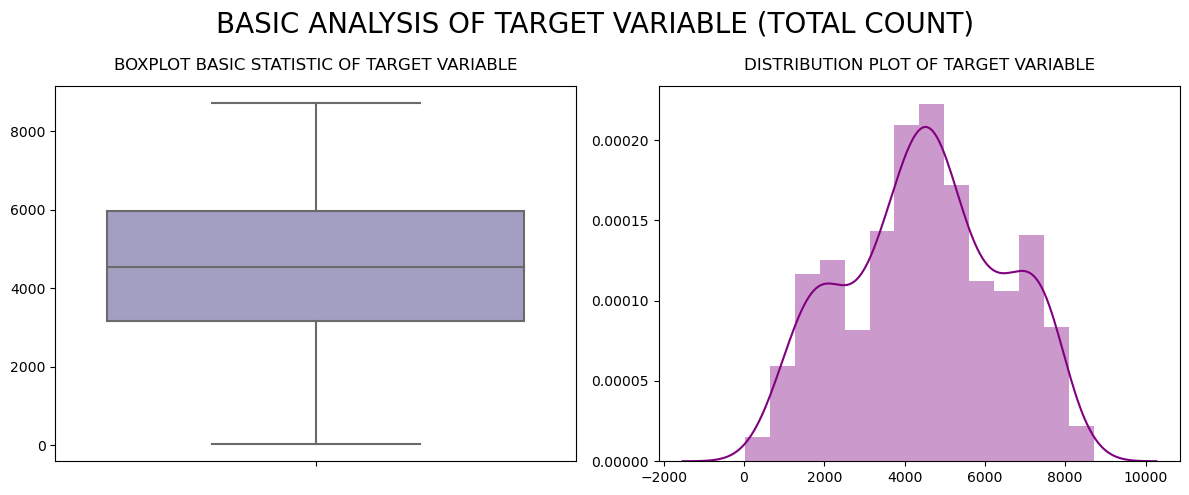

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (12,5))

# Membuat judul
fig.suptitle('Basic analysis of target variable (total count)'.upper(), fontsize= 20)

# Populating plot1:
sns.boxplot(y=day_df['total_count'], ax= ax[0], palette= 'Purples')
ax[0].set_title('Boxplot basic statistic of target variable'.upper(),
                fontsize= 12, fontweight= 20, y= 1.02)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

# Populating plot2
sns.distplot(day_df['total_count'], ax= ax[1], color= 'purple')
ax[1].set_title('Distribution plot of target variable'.upper(),
                fontsize= 12, fontweight= 20, y= 1.02)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

Ket:
- Grafik dari target variable (total count) hampir membentuk distribusi normal
- Berdasarkan boxplot, nilai median sekitar 4500. Sebelumnya, berdasarkan pembulatan diperoleh bahwa nilai Q1 sekitar 3000 dan nilai Q3 sekitar 6000

1.2 Continuous independent variable

In [ ]:
# Membuat list list continue independent variable
cont_var = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

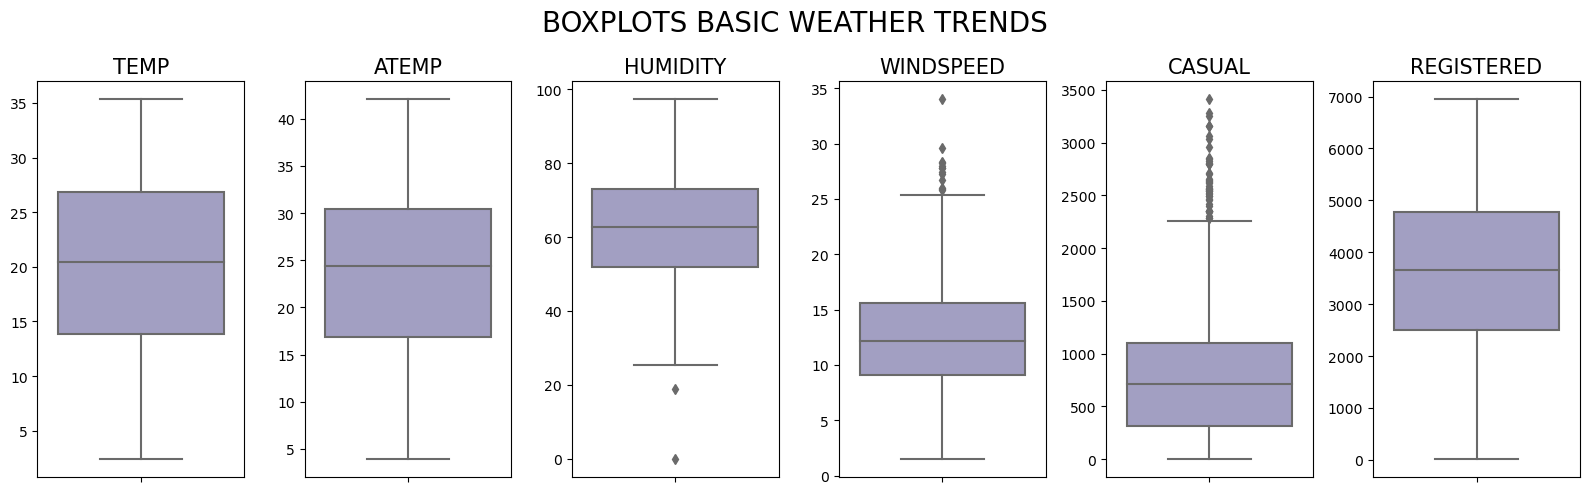

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (16,5))

# Membuat title
plt.suptitle('Boxplots basic weather trends'.upper(), fontsize= 20)

# Looping untuk mengisi subplot grid dengan plots
for i in range(len(cont_var)):
    sns.boxplot(y=day_df[cont_var[i]], ax= ax[i], palette= 'Purples')

    ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()


Ket:
- Temperatur: Q1 dan Q3 terdistribusi sekitar 14 dan 27 dengan median 21
- Atemp: Q1 dan Q3 terdistribusi sekitar 17 dan 31 dengan median 24
- Terdapat outlier pada humidity, windspeed, dan casual

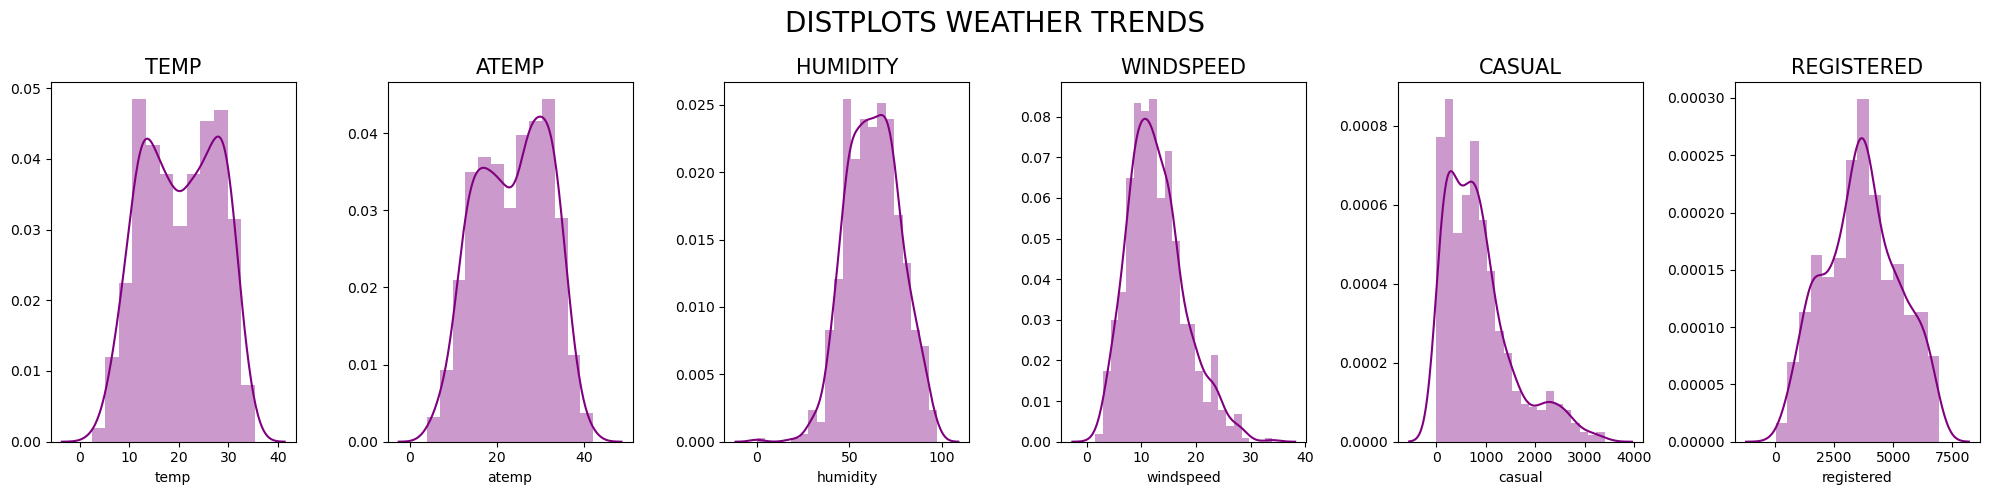

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (20,5))

# Membuat title
plt.suptitle('Distplots weather trends'.upper(), fontsize= 20)

# Looping untuk mengisi subplot grid dengan plots
for i in range(len(cont_var)):
    sns.distplot(day_df[cont_var[i]], ax= ax[i], color= 'purple')

    ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()


Ket:
- grafik windspeed dan casual miring ke kanan (right skew)
- grafik humidity termasuk grafik yang miring ke kiri (left skew)

1.3 Categorical independent variable

In [ ]:
# Membuat list variabel continue
cat_var = ['season', 'year', 'month', 'holiday', 'weekday', 'weather_condition']

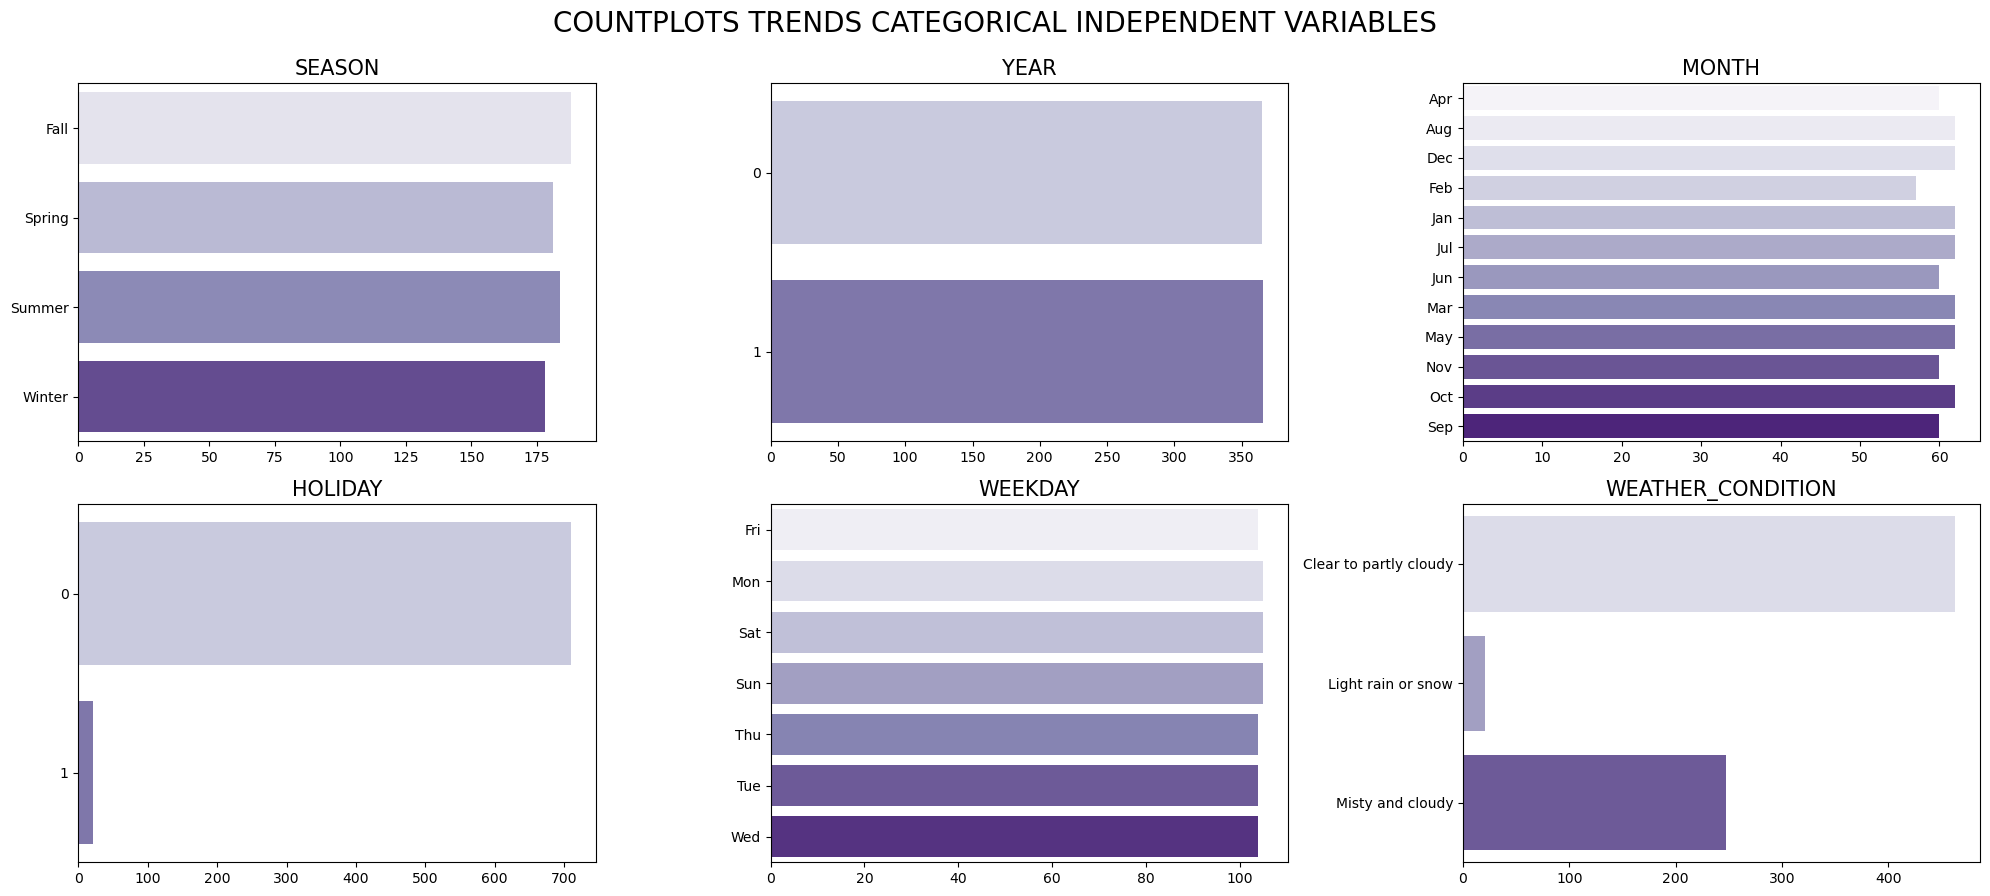

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20,9))

# Membuat main title
plt.suptitle('Countplots trends categorical independent variables'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.countplot(y=cat_var[k], data= day_df, ax= ax[i,j], palette= 'Purples')

        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')

        k+=1

plt.tight_layout()
plt.show()


Ket:
- Musim terlama adalah musim gugur (fall season), sementara musim tercepat adalah musim dingin (winter season)
- Berdasarkan grafol diatas, hanya terdapat 3 kondisi cuaca (weather condition). Sama sekali tidak terdapat hari dengn kondisi cuaca 'High rain, snow'

### 2. Bivariate analysis

2.1 Continuous independent variable

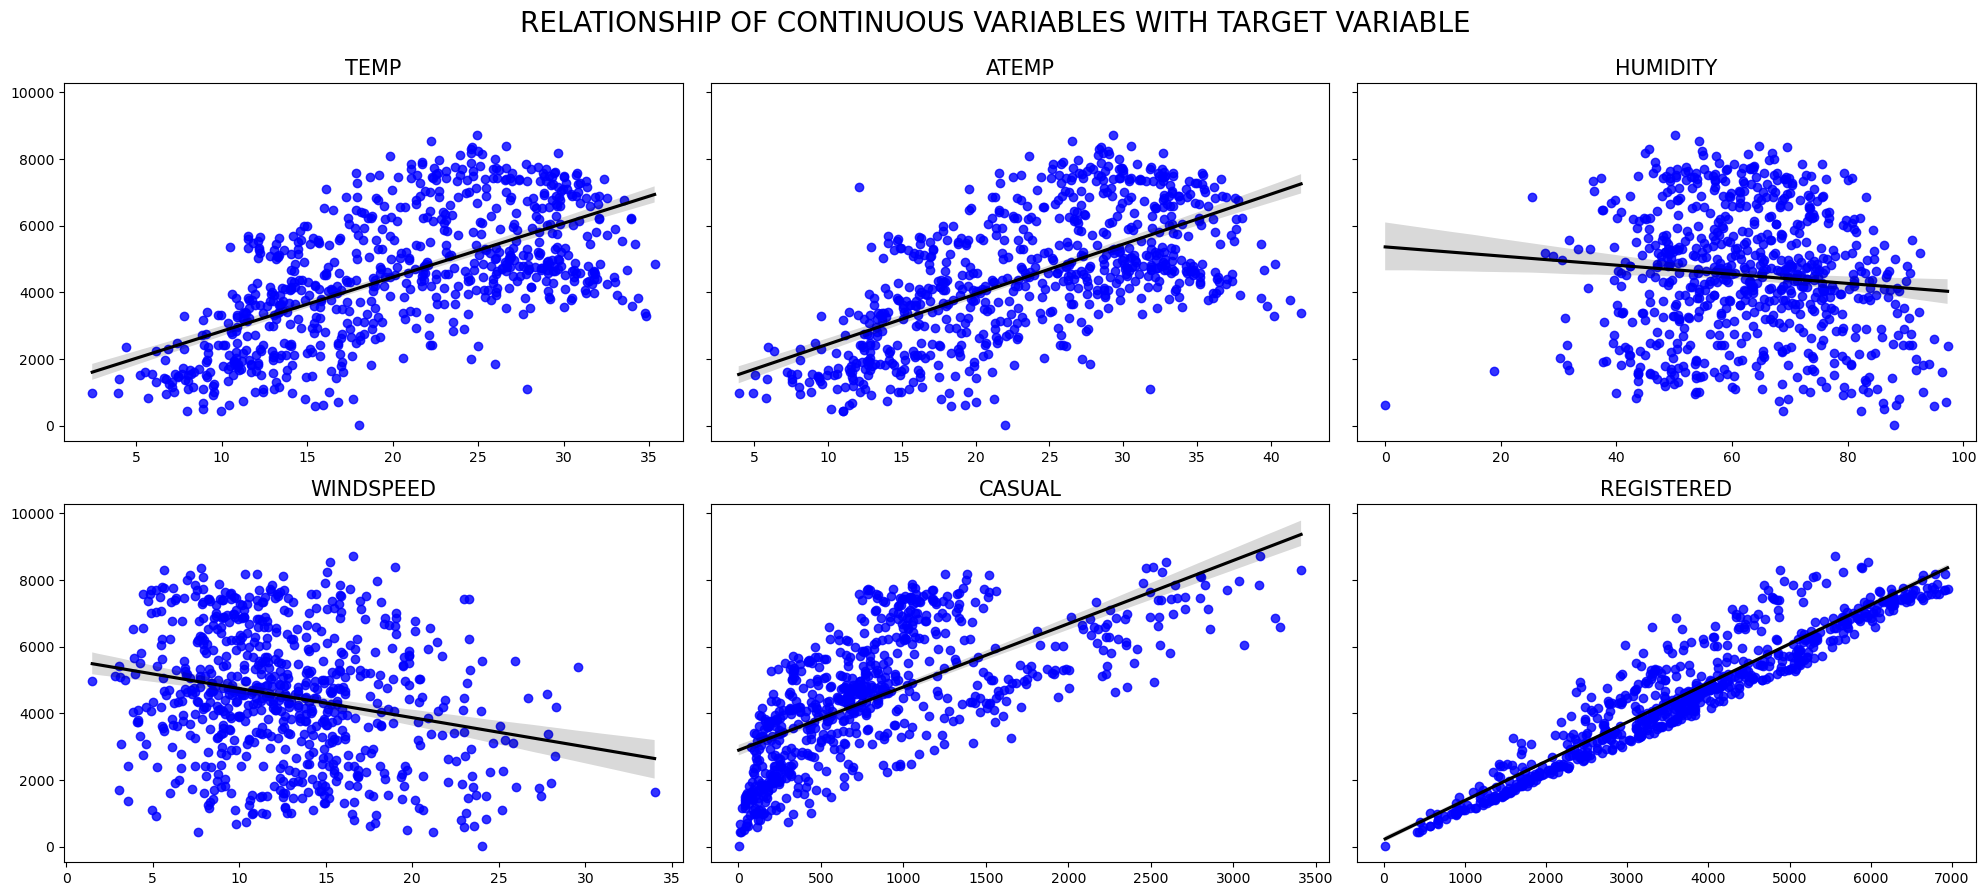

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20,9), sharey= True)

# Membuat main title
plt.suptitle('Relationship of continuous variables with target variable'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
k= 0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.regplot(x= day_df[cont_var[k]], y= day_df['total_count'], ax= ax[i,j],
                    scatter_kws= {'color':'blue'}, line_kws= {'color':'black'})

        ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')

        k+=1

plt.tight_layout()
plt.show()

Ket:
- Penyewaan sepeda berbanding lurus dengan temp dan atemp
- Penyewaan sepeda berbanding terbalik dengan himidity dan windspeed
- Penyewaan sepeda berbanding lurus dengan casual dan registered

2.2 Categorical independent variable

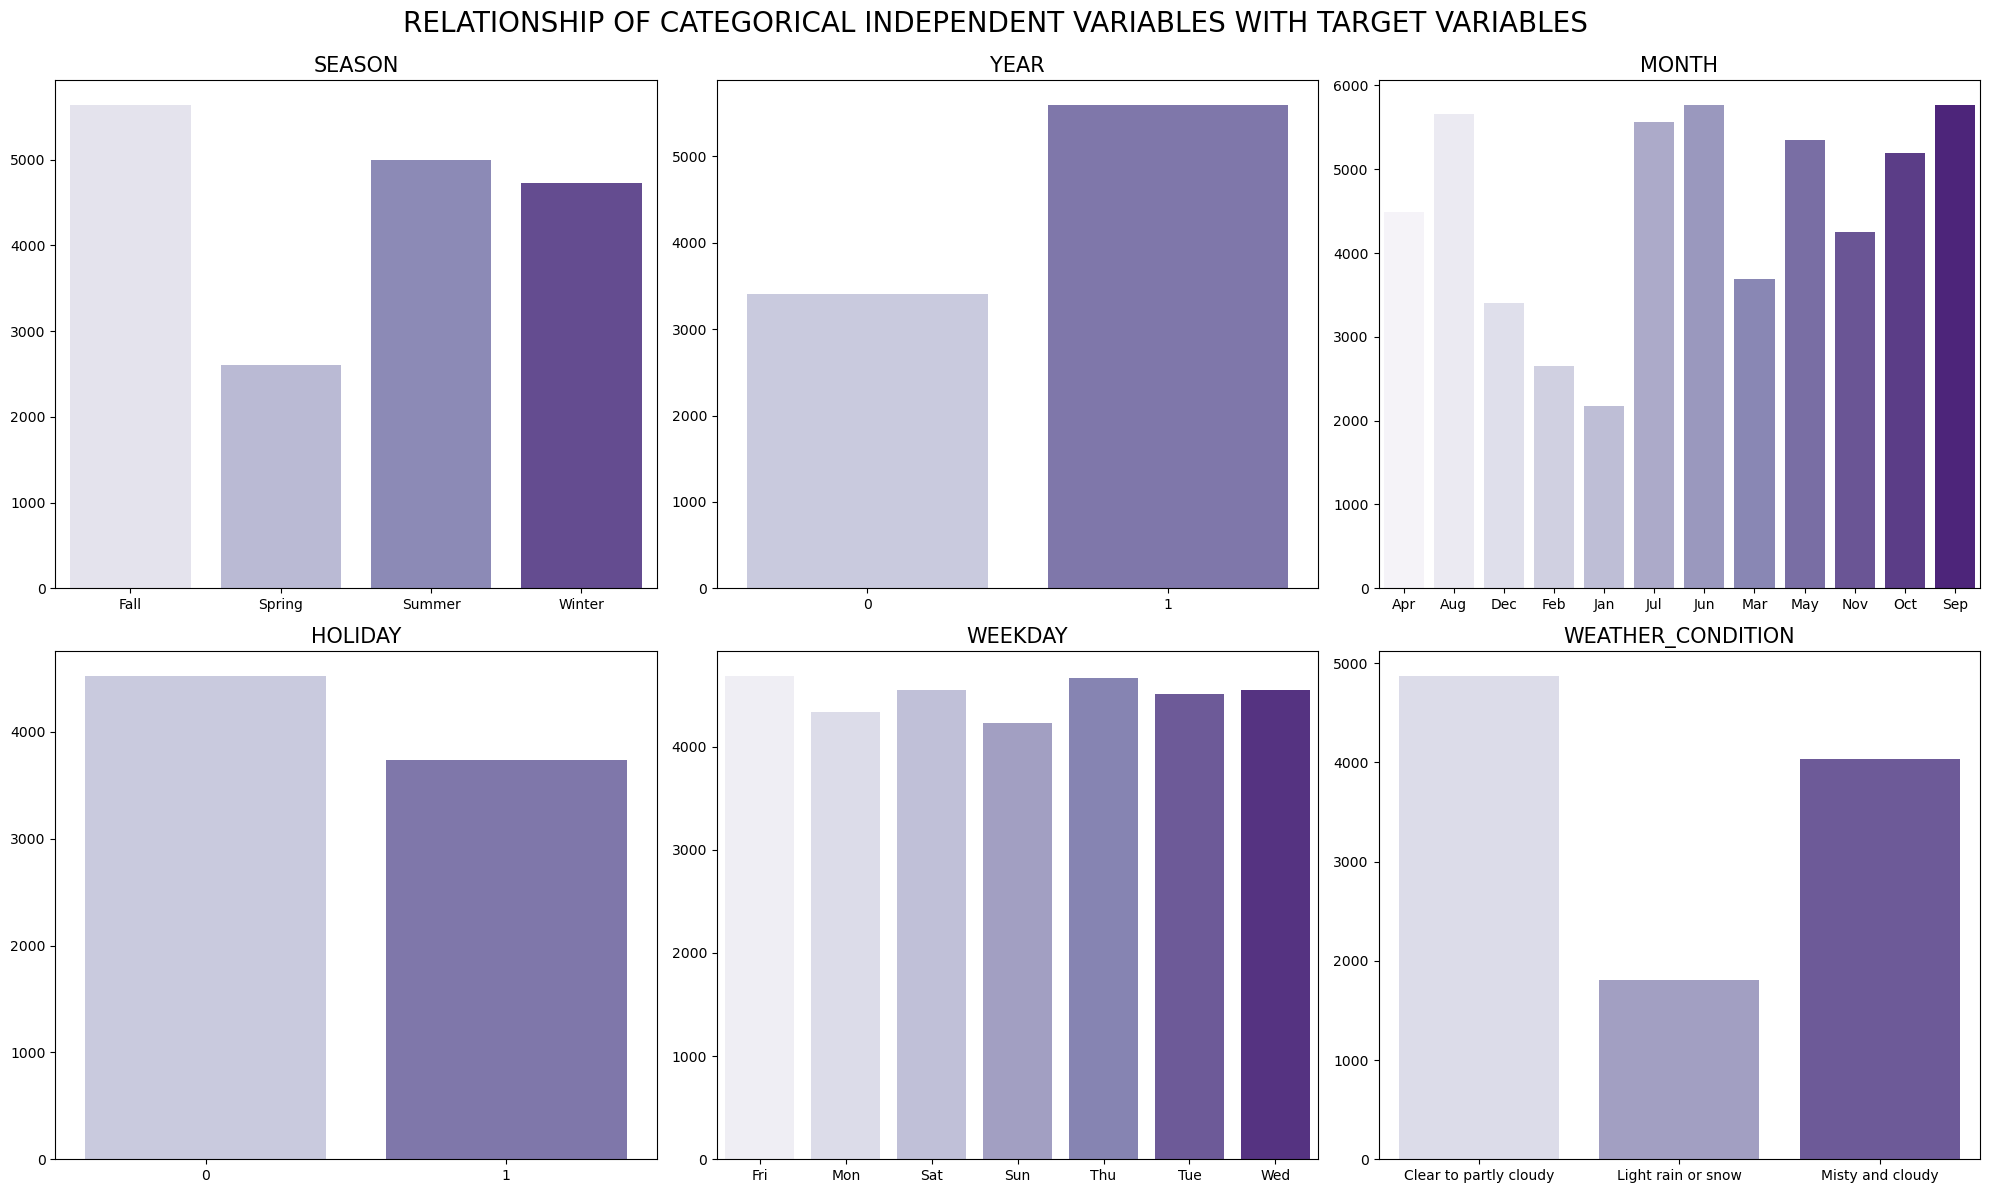

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cat_var)/2), figsize= (20,12))

# Membuat main title
plt.suptitle('relationship of categorical independent variables with target variables'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(y= day_df.groupby(by= cat_var[k]).mean()['total_count'],
                    x= day_df.groupby(by= cat_var[k]).mean().index, ax= ax[i,j], palette= 'Purples')

        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')

        k+=1

plt.tight_layout()
plt.show()



Ket:
- Peminjaman tertinggi terjadi pada fall season, diikuti oleh summer, winter, dan spring season
- Peminjaman tertinggi terjadi pada bulan Aug, Sep, dan Jun. Sementara peminjaman terkecil terjadi pada bulan Januari, Februari, dan Desember
- Peminjaman sepeda paling banyak terjadi pada saat hari kerja (workingday)
- Berdasarkan weather condition, cuaca dengan peminjaman tertingggi adalah saat "Clear to partly cloudly"

2.4 Variation of season and weather variation (temp, atemp, humidity, windspeed)

In [ ]:
# Membuat list variables
weather_var= ['temp', 'atemp', 'humidity', 'windspeed']

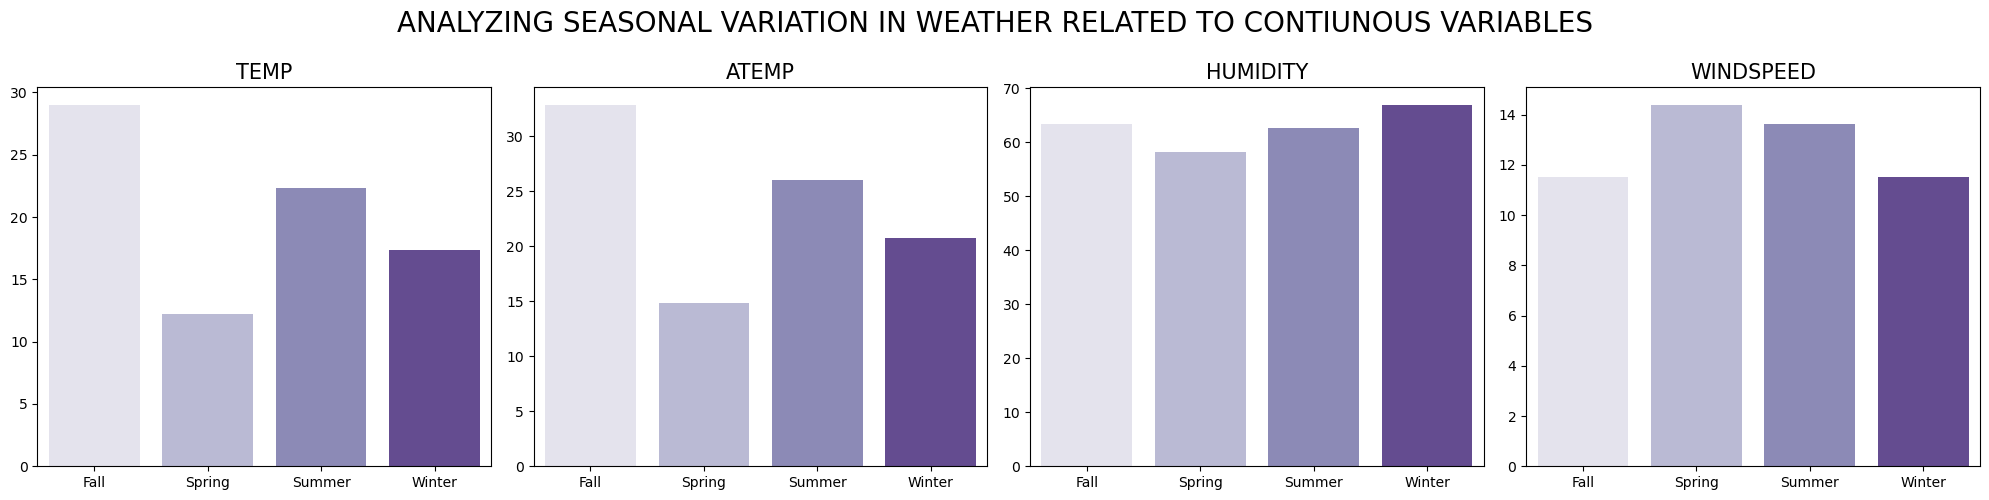

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= int(len(weather_var)), figsize= (20,5))

# Membuat main title
plt.suptitle('Analyzing seasonal variation in weather related to contiunous variables'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
for i in range(len(weather_var)):
        sns.barplot(y= day_df.groupby(by= 'season').mean()[weather_var[i]],
                x= day_df.groupby(by= 'season').mean().index, ax= ax[i], palette= 'Purples')
    
        ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

2.4 Variation of weather condition and weather variation (temp, atemp, humidity, windspeed)

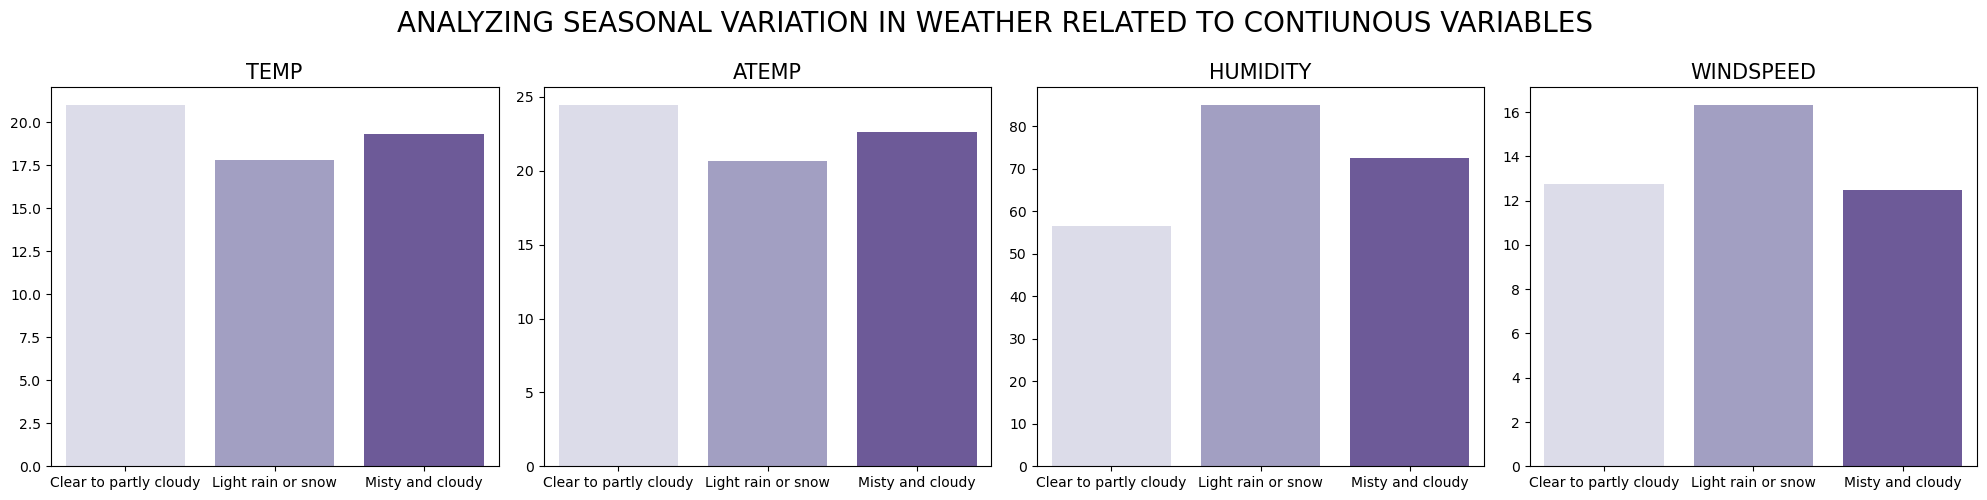

In [ ]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= int(len(weather_var)), figsize= (20,5))

# Membuat main title
plt.suptitle('Analyzing seasonal variation in weather related to contiunous variables'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
for i in range(len(weather_var)):
        sns.barplot(y= day_df.groupby(by= 'weather_condition').mean()[weather_var[i]],
                x= day_df.groupby(by= 'weather_condition').mean().index, ax= ax[i], palette= 'Purples')
    
        ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
        ax[i].set_ylabel('')
        ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

### 3. Intervariable Relationship

3.1 Intervariable relationship analysis using pairplot

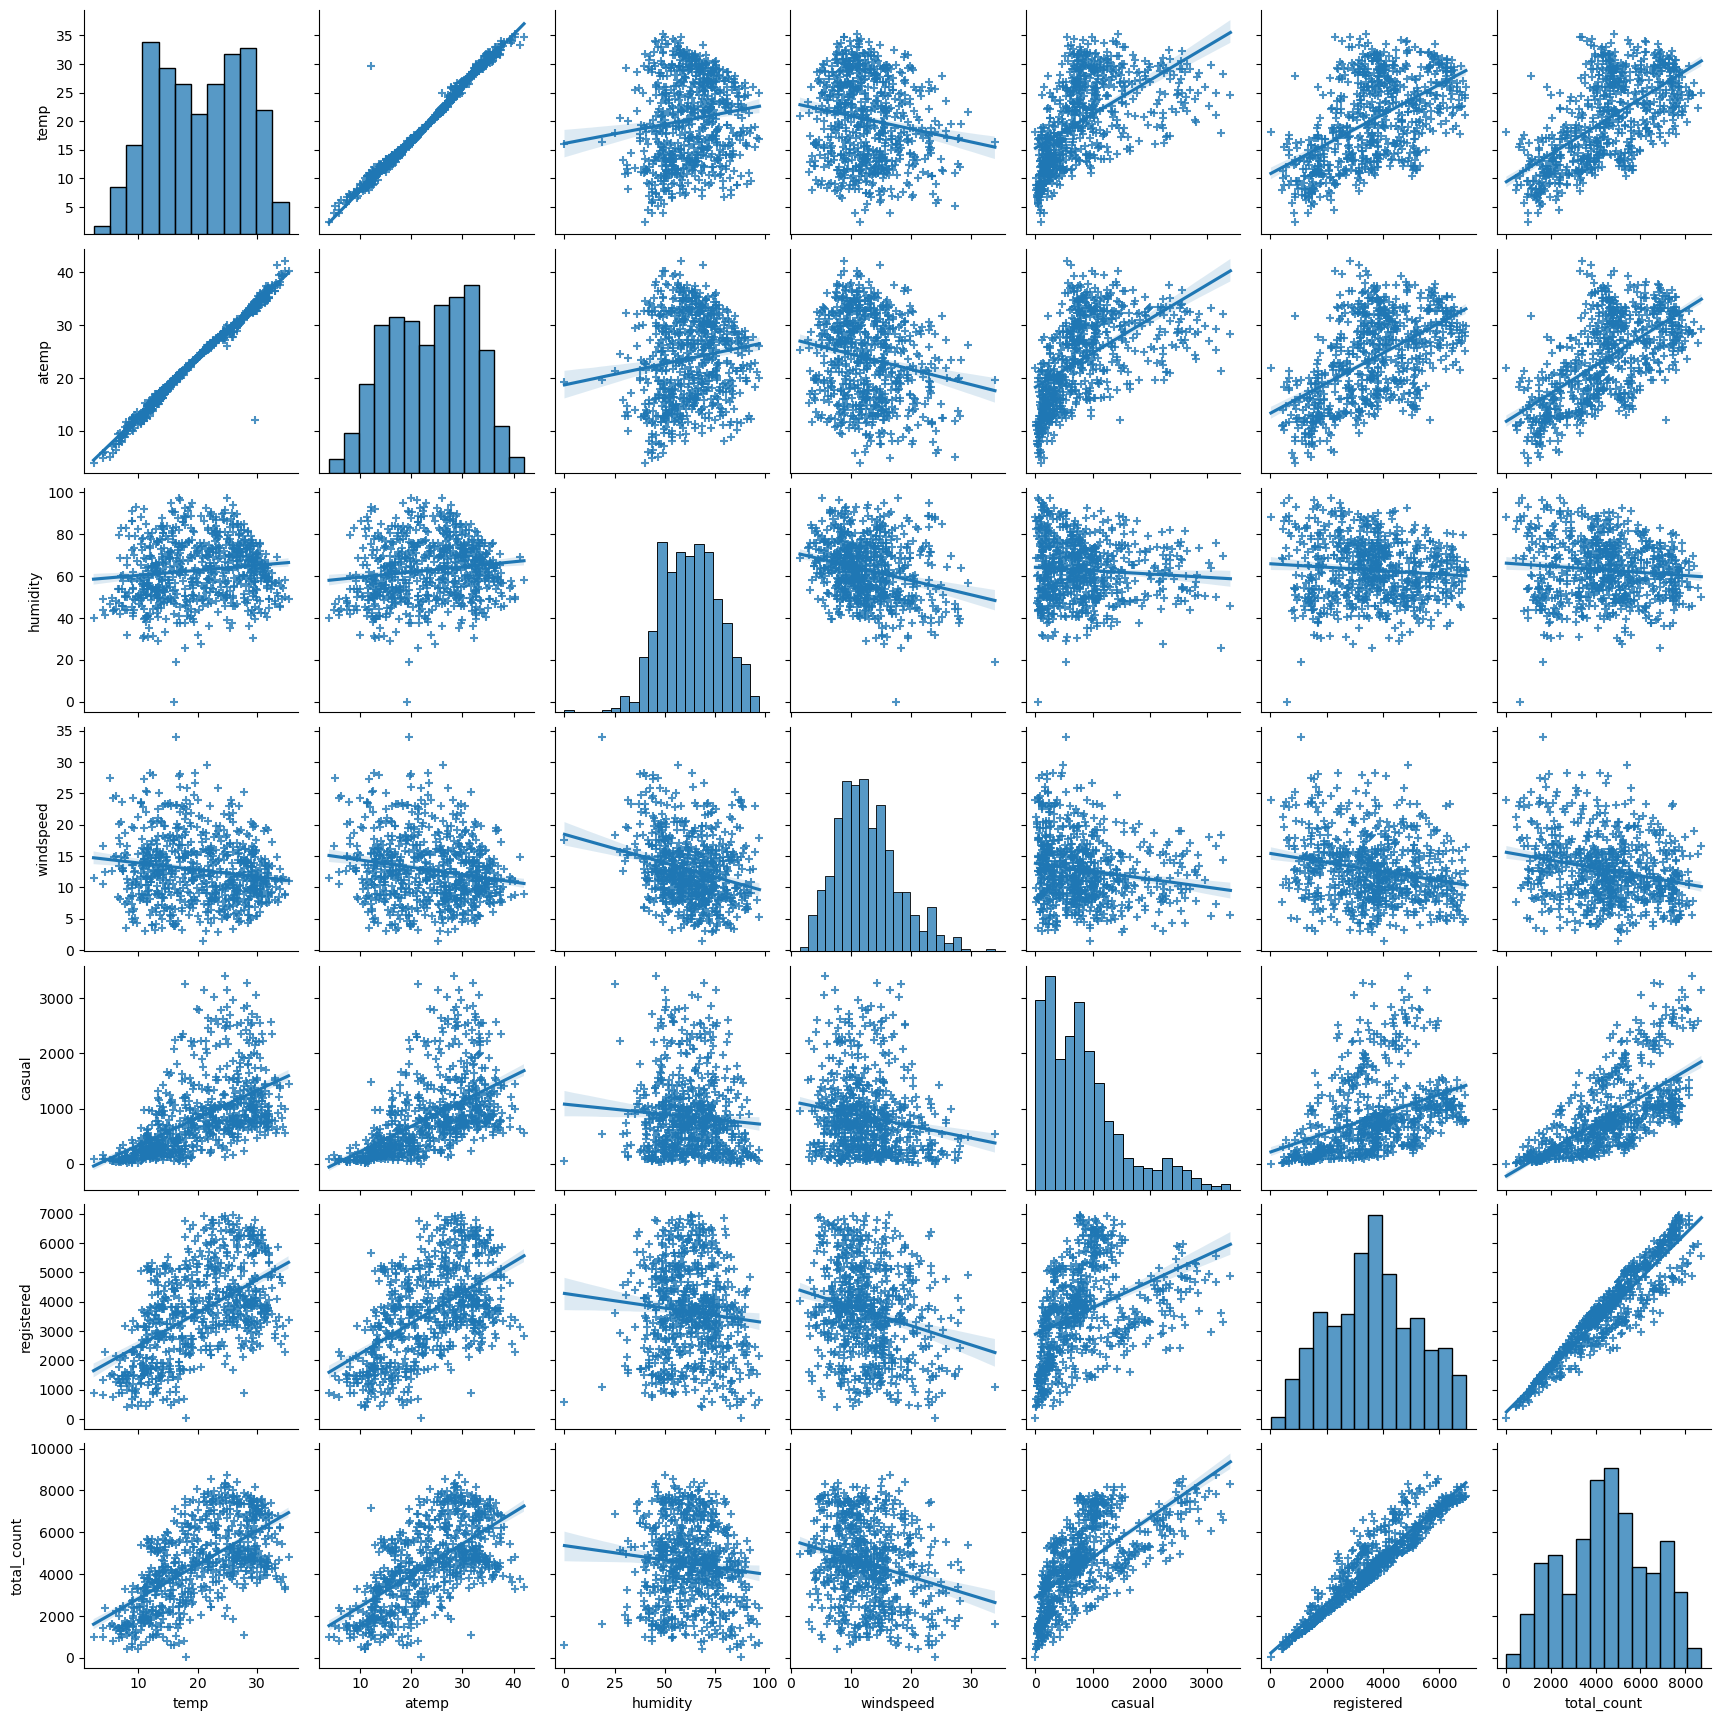

In [ ]:
sns.pairplot(day_df, kind='reg', markers= '+', palette= 'Purples')
plt.show()

3.2 Intervariable relationship analysis using heatmap

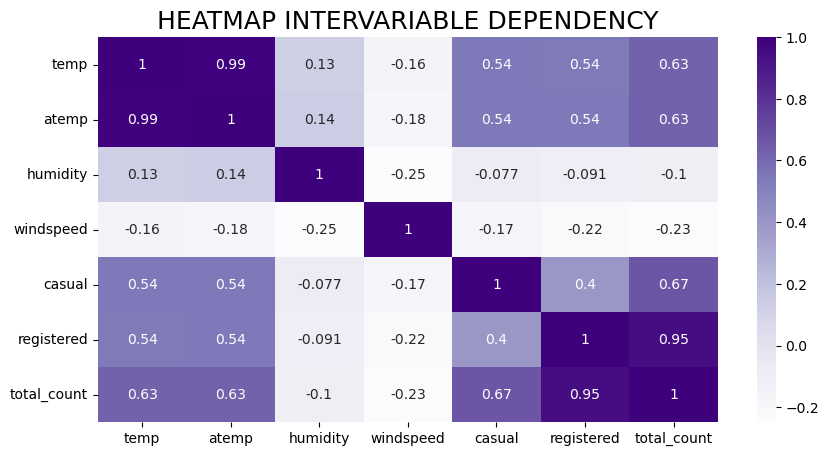

In [ ]:
# Menyiapkan plot size
plt.figure(figsize=(10,5))

# Plotting heatmap
sns.heatmap(day_df.corr(), annot= True, cmap= 'Purples')

# Membuat title
plt.title('Heatmap intervariable dependency'.upper(), fontsize= 18, y=1)

plt.show()


2.5 Tambahan

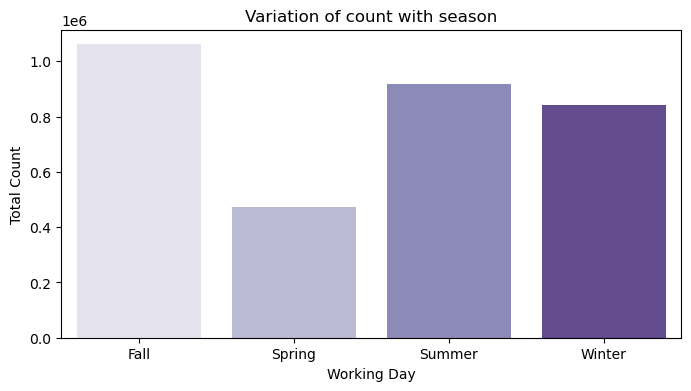

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data= day_df.groupby(by= ['season']).agg({
    'casual':['mean'],'registered':['mean'],
    'total_count':['sum','max','min','mean']}).reset_index(),
    x= 'season', y= ('total_count', 'sum'), palette= 'Purples')
ax.set_title('Variation of count with season')
plt.xlabel('Working Day')
plt.ylabel('Total Count')
plt.show()

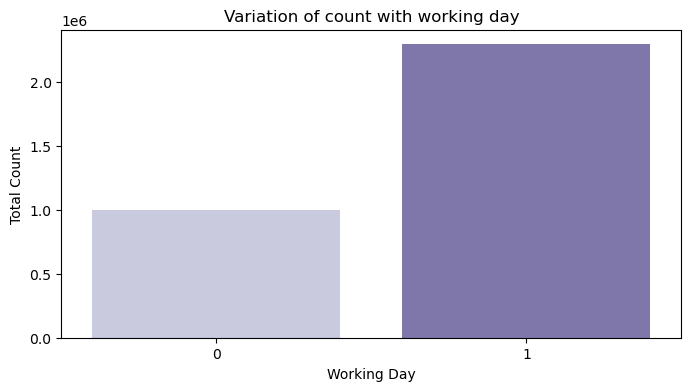

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data= day_df.groupby(by=['workingday']).agg({
    'total_count':['max','min','mean', 'sum']}).reset_index(),
    x='workingday', y=('total_count', 'sum'), palette= 'Purples')
ax.set_title('Variation of count with working day')
plt.xlabel('Working Day')
plt.ylabel('Total Count')
plt.show()

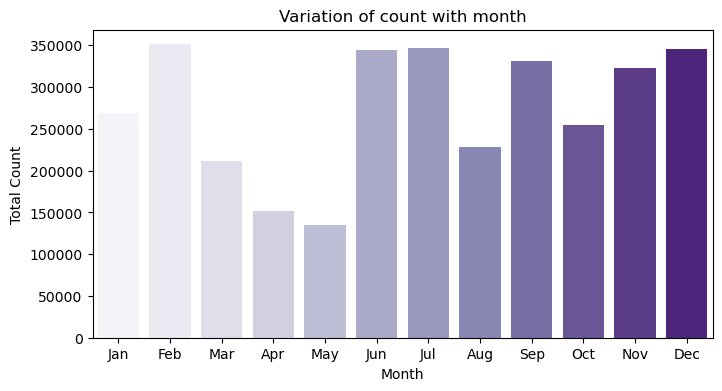

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data= day_df.groupby(by= ['month']).agg({
    'total_count':['max','min','mean', 'sum']}).reset_index(),
    x='month', y=('total_count', 'sum'), palette= 'Purples')

ax.set_title('Variation of count with month')
plt.xlabel('Month')
plt.ylabel('Total Count')

tick_val = list(range(0, 12))
tick_lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.show()

### 3. Analysis of Growth Over Last Year (GOLY)

In [ ]:
# Membuat dataframe baru untuk menunjukkan penyewaan sepeda selama 2 tahun terakhir (2011-2012)
growth_pd= day_df.pivot_table(index= 'month', columns= 'year', values= 'total_count', aggfunc= 'mean')

# Membuat judul kolom
growth_pd.columns=['2011', '2012']

# % growth column
growth_pd['percent growth']= round(((growth_pd['2012'] - growth_pd['2011'])/growth_pd['2011'])*100,2)

# Sorting dataframe
growth_pd = growth_pd.sort_values(by= 'percent growth', ascending= False)

growth_pd

,2011,2012,percent growth
month,,,
Mar,2065.967742,5318.548387,157.44
Jan,1231.903226,3120.774194,153.33
Feb,1721.964286,3556.448276,106.53
Apr,3162.333333,5807.466667,83.64
Sep,4247.266667,7285.766667,71.54
Oct,3984.225806,6414.225806,60.99
Aug,4409.387097,6919.451613,56.93
Nov,3405.566667,5088.800000,49.43
May,4381.322581,6318.225806,44.21


Ket:
- Terdapat pertumbuhan yang cukup besar antara 2011 dan 2012
- Pada bulan jan, feb, dan mar pertumbuhan mencapai lebih dari 100%

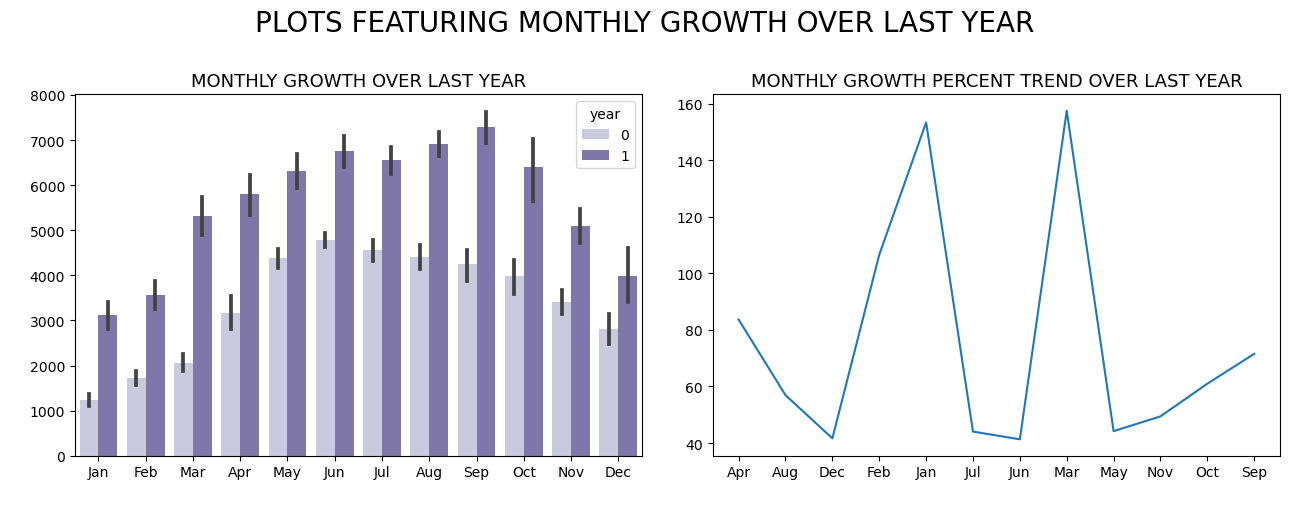

In [ ]:
# Membuat subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

# Membuat main title
plt.suptitle('Plots featuring monthly growth over last year'.upper(), fontsize=20, y=1.01)

# Mengurutkan bulan
month_order = day_df['month'].unique()[::1]

# Populating plot 1
sns.barplot(x='month', y='total_count', data=day_df, hue='year', ax=ax[0], palette='Purples', order= month_order)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].set_title('Monthly growth over last year'.upper(), fontsize=13)

# Populating plot 2
sns.lineplot(x= growth_pd.index, y= growth_pd['percent growth'], ax=ax[1], palette='Purples')
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')
ax[1].set_title('Monthly growth percent trend over last year'.upper(), fontsize=13)

plt.tight_layout()
plt.show()


### Pertanyaan 1: Pada musim dan bulan apakah yang memiliki jumlah sewa sepeda tertinggi dan terendah?

Berdasarkan EDA diperoleh bahwa:
- Peminjaman tertinggi terjadi pada fall season, diikuti oleh summer, winter, dan spring season
- Peminjaman tertinggi terjadi pada bulan Aug, Sep, dan Jun. Sementara peminjaman terkecil terjadi pada bulan Januari, Februari, dan Desember

### Pertanyaan 2: Bagaimanakah pengaruh temperatur, humidity, dan windspeed terhadap tingkat penyewaan sepeda?

Berdasarkan EDA diperoleh bahwa:
- Penyewaan sepeda berbanding lurus dengan temp dan atemp
- Penyewaan sepeda berbanding terbalik dengan himidity dan windspeed

### Pertanyaan 3: Bagaimana pertumbuhan bisnis tersebut pada tahun 2011-2012?

Dengan menggunakan Growth Over Last Year (GOLY) analysis, terlihat bahwa dalam kurun waktu 2011-2012 bisnis rental sepeda tersebut mengalami pertumbuhan yang cukup besar hingga mencapai lebih dari 100%

## Conclusion

- Conclution pertanyaan 1:
    Penyewaan sepeda paling banyak terjadi pada fall season, kemudian diikuti oleh summer, winter, dan spring season. Jika berdasarkan bulan, penyewaan sepeda paling banyak terjadi pada bulan aug, sep, dan jun, sementara penyewaan paling sedikit terjadi pada bulan jan, feb, des.
    
- Conclution pertanyaan 2:
    Semakin tinggi temperatur dan atemp, maka minat tingkat penyewaan sepeda semakin meningkat. Namun, semakin tinggi humidity dan windspeed minat penyewaan sepeda semakin rendah, begitu pula sebaliknya

- Conclution pertanyaa 3:
    Dalam kurun waktu 2011-2012, bisnis rental tersebut mengalami pertumbuhan yang cukup pesat. Terlihat pada bulan jan, feb, dan mar, pertumbuhan mencapai lebih dari 100%
